# Machine Project 3: Loan Analysis

In [1]:
# Add imports used throughout the project here
import loans
%load_ext autoreload
%autoreload 2
import search
import matplotlib.pyplot as plt
import time
from zipfile import ZipFile
import csv
import io
import json
import pickle

# Group Part (75%) <small> continued...<small/>

For this portion of the machine project, you may collaborate with your group members in any way (including looking at group members' code). You may also seek help from CS 320 course staff (peer mentors, TAs, and the instructor). You **may not** seek or receive help from other CS 320 students (outside of your group) or anybody else outside of the course.

## Part 3: 'Merchants Bank of Indiana' Analysis
For part 3 of this machine project, we will begin using the custom classes we created to do analysis on some banks, loans, and applicants. We will use our newly created `Bank`, `Loan`, and `Applicant` classes to do this analysis.

For the following questions, create a `Bank` object for the bank named "Merchants Bank of Indiana".

In [2]:
# Create Bank object for "Merchants Bank of Indiana"
MBI = loans.Bank('Merchants Bank of Indiana')
MBI.loan_list[:2]

[<Loan: 3.875% on $135000.0 with 2 applicant(s)>,
 <Loan: 3.75% on $125000.0 with 1 applicant(s)>]

### Q1: What is the average interest rate for the bank?

Skip loans where the interest rate is not specified (`-1`) in your calculation.

In [3]:
#Q1
sum([loan.interest_rate for loan in MBI.loan_list if loan.interest_rate!=-1])/len([loan.interest_rate for loan in MBI.loan_list if loan.interest_rate!=-1])

3.2181818181818183

### Q2: How many applicants are there per loan, on average?

In [4]:
#Q2
sum([len(loan.applicants) for loan in MBI.loan_list])/len(MBI.loan_list)

1.6724137931034482

### Q3: What is the distribution of ages?

Answer with a dictionary, like this:

```
{'65-74': 6, '<25': 2, ...}
```

Remember that the order of the keys does **not** matter, so if the tester is giving you 
errors, then you will need to double check that all of the values are correct.


In [5]:
#Q3
mbi_age = {}
for loan in MBI.loan_list:
    for applicant in loan.applicants:
        if applicant.age not in mbi_age:
            mbi_age[applicant.age] = 1
        else:
            mbi_age[applicant.age] += 1
mbi_age

{'65-74': 6, '<25': 2, '35-44': 43, '25-34': 28, '45-54': 16, '55-64': 2}

### Requirement: `BST` of Loans for Q4 and Q5

For the following questions, create a `BST` tree.  Loop over every loan in the bank, adding each to the tree.  The `key` passed to the `add` call should be the `.interest_rate` of the `Loan` object, and the `val` passed to `add` should be the `Loan` object itself.

If we called our tree something like `mbi_tree` while creating it, we could now try running `mbi_tree.root.values`, and we can verify that we get two loans back:

```python
[<Loan: 3.875% on $135000.0 with 2 applicant(s)>,
 <Loan: 3.875% on $105000.0 with 2 applicant(s)>]
```

In [6]:
MBI.loan_list
# A list of loans (all in Loan class)

[<Loan: 3.875% on $135000.0 with 2 applicant(s)>,
 <Loan: 3.75% on $125000.0 with 1 applicant(s)>,
 <Loan: 3.375% on $285000.0 with 2 applicant(s)>,
 <Loan: 3.25% on $245000.0 with 2 applicant(s)>,
 <Loan: 3.875% on $105000.0 with 2 applicant(s)>,
 <Loan: 3.5% on $145000.0 with 2 applicant(s)>,
 <Loan: 3.25% on $185000.0 with 1 applicant(s)>,
 <Loan: 3.25% on $145000.0 with 1 applicant(s)>,
 <Loan: 3.25% on $285000.0 with 1 applicant(s)>,
 <Loan: -1% on $285000.0 with 2 applicant(s)>,
 <Loan: 3.5% on $135000.0 with 1 applicant(s)>,
 <Loan: 3.25% on $185000.0 with 2 applicant(s)>,
 <Loan: 3.625% on $175000.0 with 1 applicant(s)>,
 <Loan: -1% on $185000.0 with 1 applicant(s)>,
 <Loan: 3.5% on $125000.0 with 1 applicant(s)>,
 <Loan: 3.25% on $225000.0 with 1 applicant(s)>,
 <Loan: 3.5% on $115000.0 with 2 applicant(s)>,
 <Loan: 3.375% on $225000.0 with 1 applicant(s)>,
 <Loan: 3.25% on $285000.0 with 2 applicant(s)>,
 <Loan: 3.125% on $135000.0 with 2 applicant(s)>,
 <Loan: 3.0% on $24500

In [7]:
# Create BST of Loans
mbi_tree = search.BST()
for loan in MBI.loan_list:
    mbi_tree.add(loan.interest_rate,loan)

### Q4: How many interest rate values are missing?

Don't loop over every loan to answer.  Use your tree to get and count loans with missing rates (that is, `-1`).

In [8]:
#Q4
len(mbi_tree[-1])

3


### Q5: How tall is the tree?

The height is the number of edges in the path from the root to the deepest node. Write a recursive function or method to answer. This can be defined in your notebook or in your `search.py` module as either a standalone function, or as a method of the `BST` class.
**Height:**

<img src="img/bst_height.png" width="300px">

In [9]:
#Q5
mbi_tree.height()

8

# Individual Part (25%)

For this portion of the machine project, you are only allowed to seek help from CS 320 course staff (peer mentors, TAs, and the instructor). You **may not** receive help from anyone else.

For part 4 of this machine project, you will continue to do analysis using `Bank`, `Loan`, and `Appilcant` objects, only this time we will be using a bank
that has more data associated with it. Additionally, we will do some more benchmarking to see how our new data structures improve
lookups as well as some algorithms work to efficiently find desired statistics from our data.

## Part 4: 'Landmark Credit Union' Analysis

Build a new `Bank` and corresponding `BST` object as before, but now for "Landmark Credit Union".

In [10]:
# Create Bank object for "Landmark Credit Union"
lcu = loans.Bank("Landmark Credit Union")
lcu_tree = search.BST()
for loan in lcu.loan_list:
    mbi_tree.add(loan.interest_rate,loan)

### Q6: How long does it take to add the first 15,000 loans to the tree?

Answer with a plot, where the x-axis is how many loans have been added so far, and the y-axis is the total time that has passed so far.  You'll need to measure how much time has elapsed (since the beginning) after each `.add` call (until the first 15000 loans) using `time.time()`. Your code has to add all loans available for LCU to the tree and measure the time it takes only for the first 15000.

**Note:** Performance and the amount of noise will vary from one virtual machine to another, so your plot probably won't be identical (this applies to the other performance plots too). 

**_Make sure to include a title, and axis labels_**

**Important:** Make sure to use `"BST Adds"` as the label of the line

<img src="img/q6.png" width="400px">

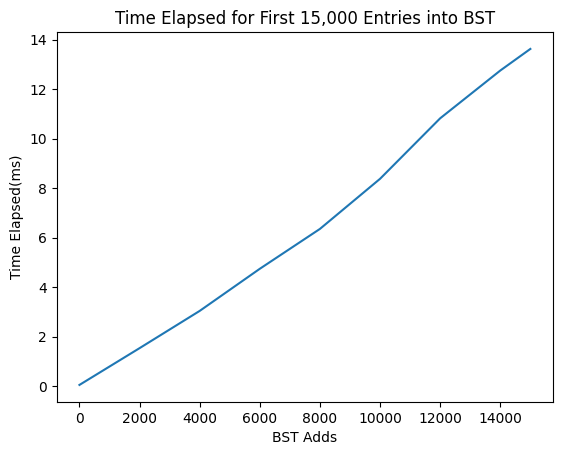

In [11]:
#Q6
time_elapsed = []
marks = [1,2000,4000,6000,8000,10000,12000,14000,15000]
# ADD CODE HERE
lcu_tree = search.BST()
count = 0
time1 = time.time()
for loan in lcu.loan_list:
    count += 1
    lcu_tree.add(loan.interest_rate,loan)
    if count in marks:
        time_elapsed.append((time.time()-time1)*1000)

fig, ax = plt.subplots()

# PLOT HERE

plt.plot(marks,time_elapsed,label='BST Adds')
plt.title('Time Elapsed for First 15,000 Entries into BST')
plt.xlabel('BST Adds')
plt.ylabel("Time Elapsed(ms)")


# IMPORTANT -- Do not remove -- 
with open("Q6.pkl", "wb") as f:
    pickle.dump(fig, f)

plt.show()
plt.close(fig)

### Q7: How fast are tree lookups?

Create a bar plot with two bars:
1. time to find all `interest_rate` values equal to `1.99`, by looping over every loan and keeping a counter
2. time to compute `len(NAME_OF_YOUR_BST_OBJECT[1.99])`

*Note*: Both methods are calculating the same value: the amount of loans with an interest rate of 1.99. However, this value is not used anywhere in the graph, just the time that each method takes to find this value.

**_Make sure to include a title, and axis labels_**

<img src="img/q7.png" width="400px">

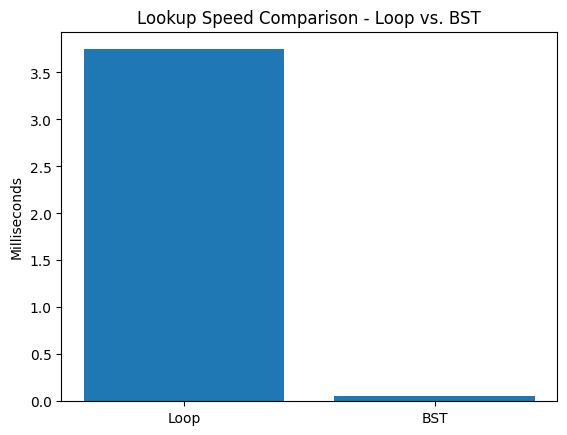

In [12]:
#Q7

# ADD CODE HERE
t1_loop = time.time()
counter = 0
for loan in lcu.loan_list:
    if loan.interest_rate == 1.99:
        counter += 1
t2_loop = time.time()


t1_bst = time.time()
lcu_tree[1.99]
t2_bst = time.time()

fig, ax = plt.subplots()

# PLOT HERE

plt.bar(["Loop", "BST"],[(t2_loop-t1_loop)*1000,(t2_bst-t1_bst)*1000])
plt.ylabel("Milliseconds")
plt.title('Lookup Speed Comparison - Loop vs. BST')
# IMPORTANT -- Do not remove -- 
with open("Q7.pkl", "wb") as f:
    pickle.dump(fig, f)

plt.show()
plt.close(fig)

### Q8: What is the distribution of amount of racial identities across all applicants?

Answer with a bar graph. The x-axis should be the amount of racial identities
indicated by the applicant/co-applicant, while the y-axis should be the count
of applicants/co-applicants with the respective amount of racial identities.

It may be helpful to create a dictionary before you plot the values. If you do, the
corresponding values should be as follows:

```python
{0: 2639, 1: 24799, 2: 478, 3: 51, 4: 6}
```

**Note:** The x-axis should be the number of race identities selected by the applicants, not the individual races. (The height of the first bar represents how many applicants/co-applicants have 0 listed races)

**_Make sure to include a title, and axis labels_**

<img src="img/q8.png" width="400px">

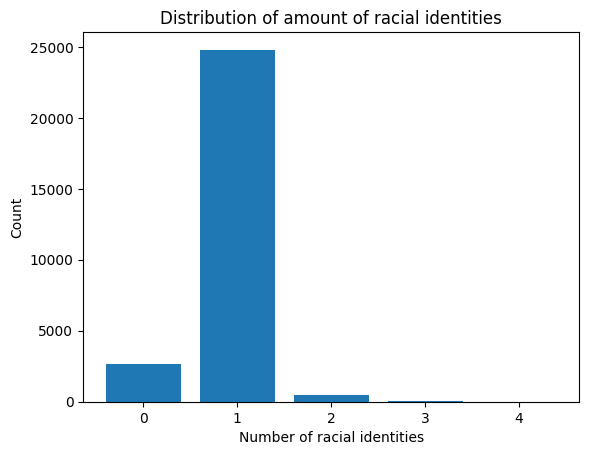

In [13]:
#Q8

# ADD CODE HERE

race_count = {}

for loan in lcu.loan_list:
    for applicant in loan.applicants:
        if len(applicant.race) not in race_count:
            race_count[len(applicant.race)] = 1
        else:
            race_count[len(applicant.race)] += 1
            
fig, ax = plt.subplots()

# PLOT HERE
plt.bar(race_count.keys(),race_count.values())
plt.xlabel("Number of racial identities")
plt.ylabel("Count")
plt.title('Distribution of amount of racial identities')
# IMPORTANT -- Do not remove -- 
with open("Q8.pkl", "wb") as f:
    pickle.dump(fig, f)

plt.show()
plt.close(fig)

### Q9: How many leaf nodes are in the tree?

Write a recursive function or method to count the number of leaf nodes present in the given BST.


In [14]:
#Q9
lcu_tree.count_leaf()

63

### Q10: What is the third largest interest rate in the Bank BST?

Write a **recursive** function or method that can return the top 3 (or N) keys for any subtree.

In [15]:
#Q10
lcu_tree.nth_largest_rate(3)

9.85